In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#importing dataset using panda
dataset = pd.read_csv('house_data.csv')
#to see what my dataset is comprised of
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:

print(dataset.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [3]:
dataset = dataset.drop(['id','date'], axis = 1)

/Users/nethrachekuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


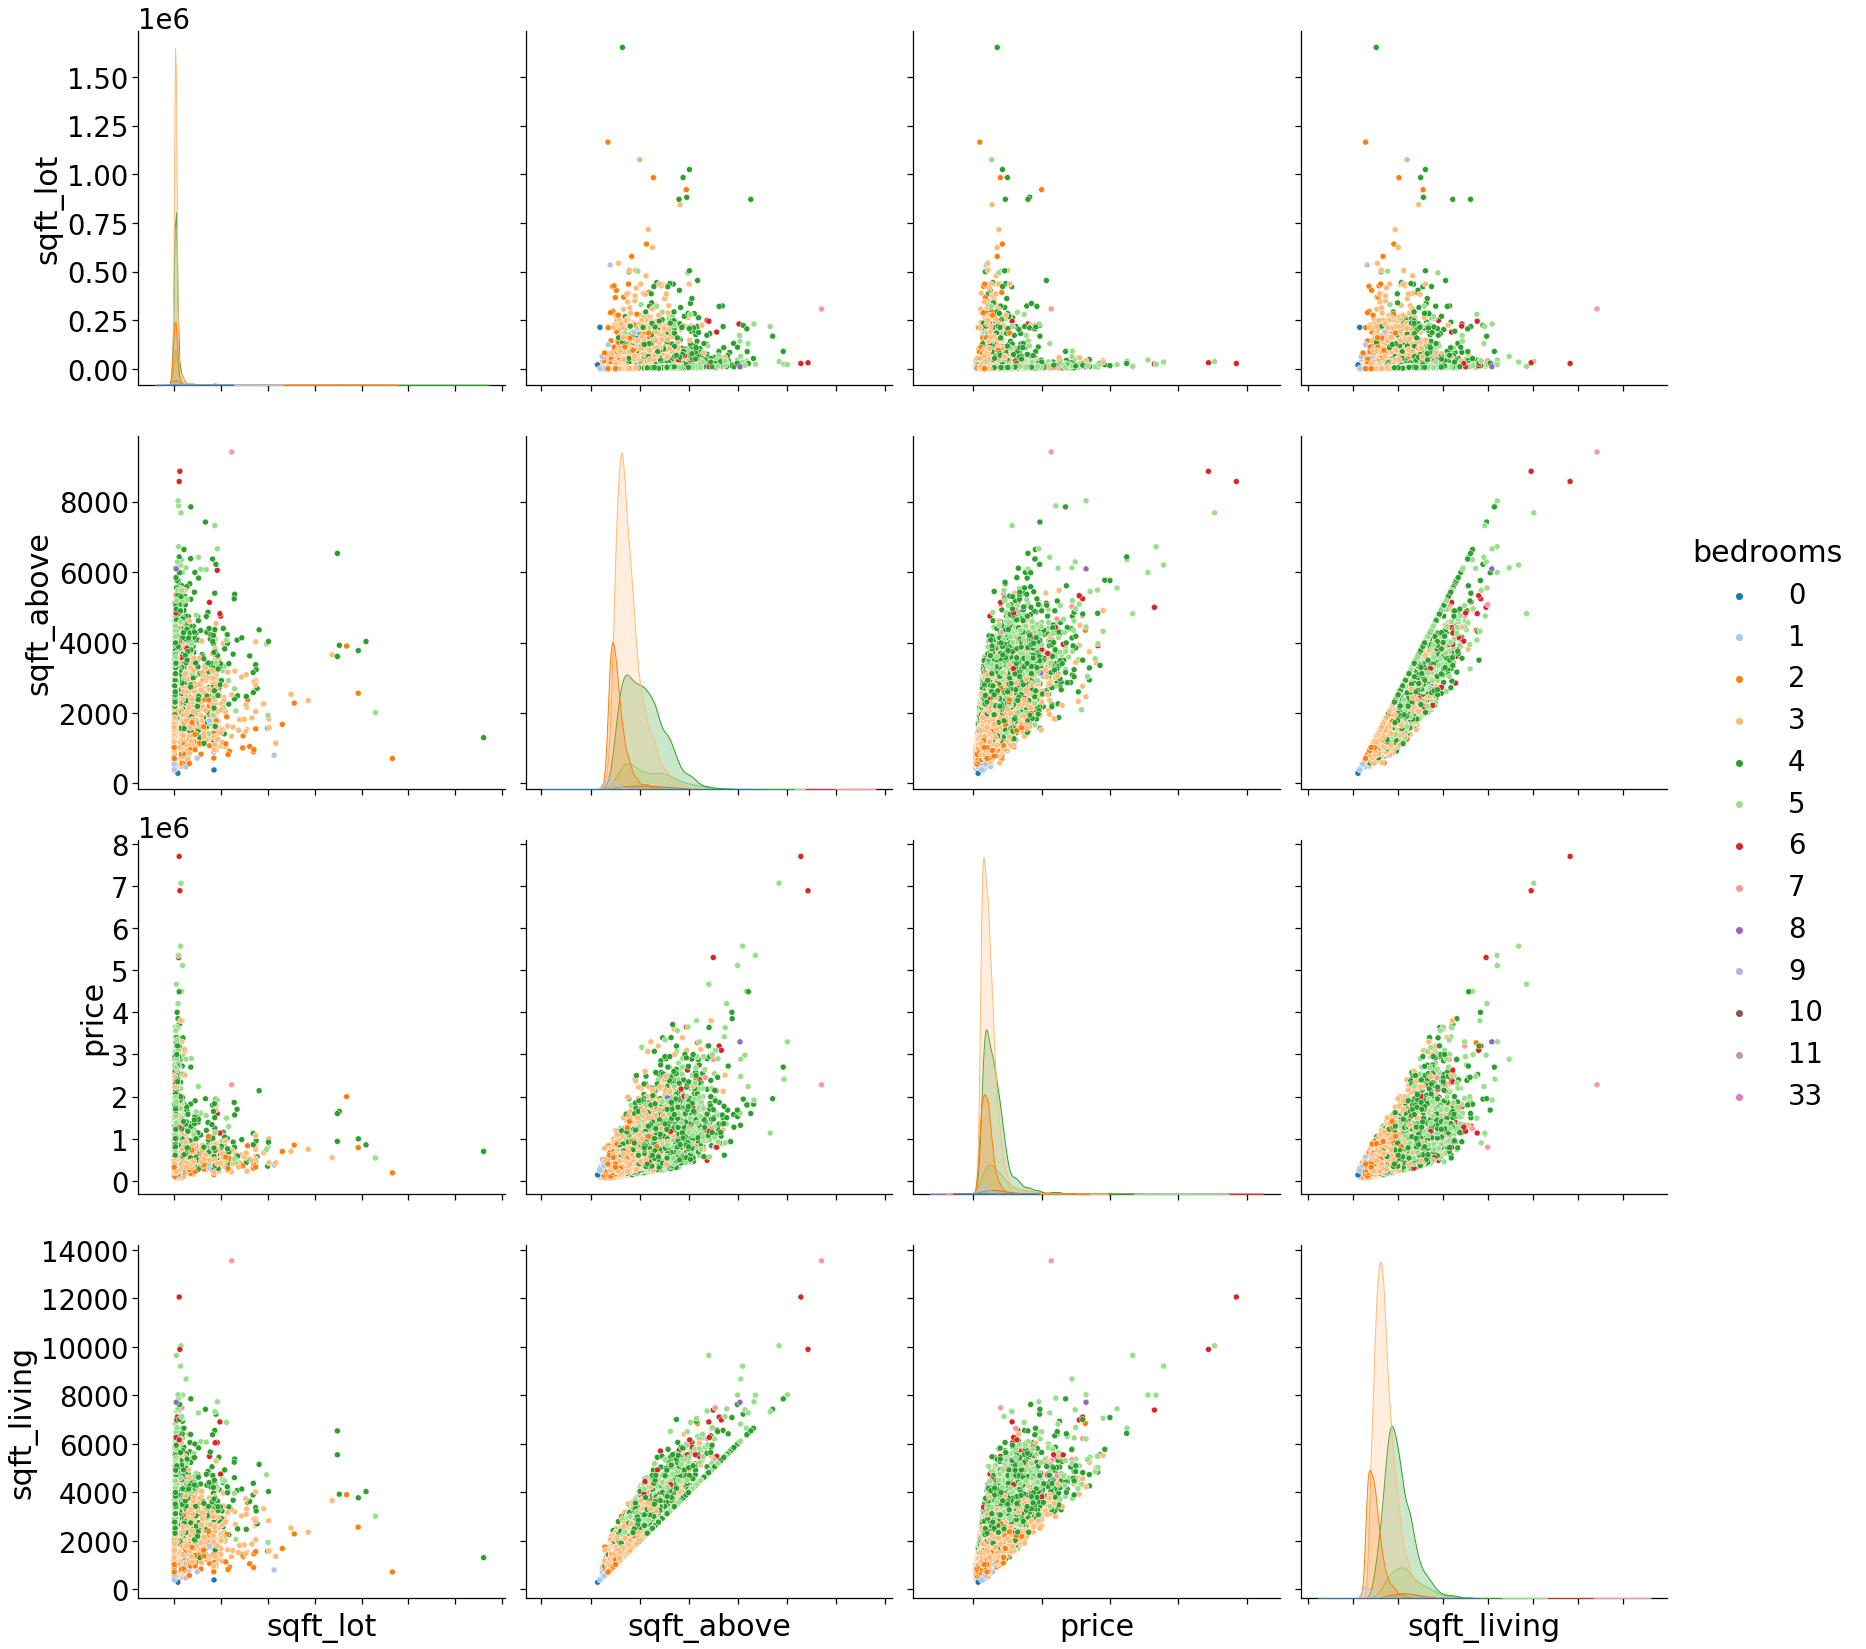

In [4]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

In [6]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [8]:
import statsmodels.formula.api as sm

In [10]:
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [12]:
x_opt=X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]

In [14]:
import statsmodels.api as sm

In [15]:
regressor_OLS = sm.OLS(endog=y,exog=x_opt).fit()

In [16]:
regressor_OLS.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.211e+04
Date:                Wed, 28 Dec 2022   Prob (F-statistic):                        0.00
Time:                        13:26:06   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21596   BIC:                                  5.894e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.551e+04   1888.716    -18.802      0.000   -3.92e+04   -3.18e+04
x2          4.105e+04   3253.759     12.618      0.000    3.47e+04    4.74e+04
x3           110.2642      2.268     48.607      0.000     105.818     114.711
x4             0.1334      0.048      2.786      0.005       0.040       0.227
x5          5261.5471   3541.347      1.486      0.137   -1679.755    1.22e+04
x6          5.833e+05   1.74e+04     33.598      0.000    5.49e+05    6.17e+05
x7          5.236e+04   2128.298     24.600      0.000    4.82e+04    5.65e+04
x8          2.721e+04   2323.818     11.709      0.000    2.27e+04    3.18e+04
x9          9.548e+04   2145.492     44.503      0.000    9.13e+04    9.97e+04
x10           71.3928      2.238     31.902      0.000      67.006      75.779
x11           38.8714      2.624     14.813      0.000      33.728      44.015
x12        -2561.7953     68.006    -37.670      0.000   -2695.092   -2428.498
x13           20.4187      3.646      5.600      0.000      13.272      27.566
x14         -519.0756     17.826    -29.119      0.000    -554.016    -484.136
x15         6.022e+05   1.07e+04     56.106      0.000    5.81e+05    6.23e+05
x16        -2.179e+05   1.31e+04    -16.683      0.000   -2.44e+05   -1.92e+05
x17           23.0994      3.392      6.811      0.000      16.452      29.747
x18           -0.3761      0.073     -5.137      0.000      -0.520      -0.233
==============================================================================
Omnibus:                    18403.146   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1873534.498
Skew:                           3.572   Prob(JB):                         0.00
Kurtosis:                      48.049   Cond. No.                     1.94e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.83e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
x_opt=X[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17]]
regressor_OLS = sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                          1.217e+04
Date:                Wed, 28 Dec 2022   Prob (F-statistic):                        0.00
Time:                        13:26:57   Log-Likelihood:                     -2.9516e+05
No. Observations:               21613   AIC:                                  5.903e+05
Df Residuals:                   21597   BIC:                                  5.905e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.833e+04   1935.490    -19.804      0.000   -4.21e+04   -3.45e+04
x2          4.051e+04   3337.593     12.138      0.000     3.4e+04    4.71e+04
x3           112.2505      2.326     48.255      0.000     107.691     116.810
x4             0.1063      0.049      2.165      0.030       0.010       0.203
x5          5493.8277   3632.629      1.512      0.130   -1626.393    1.26e+04
x6          7.924e+04   2022.997     39.169      0.000    7.53e+04    8.32e+04
x7          2.813e+04   2383.557     11.801      0.000    2.35e+04    3.28e+04
x8          9.367e+04   2200.107     42.577      0.000    8.94e+04     9.8e+04
x9            75.1352      2.293     32.771      0.000      70.641      79.629
x10           37.1153      2.691     13.791      0.000      31.840      42.390
x11        -2524.4770     69.750    -36.193      0.000   -2661.192   -2387.762
x12           27.3206      3.734      7.316      0.000      20.001      34.640
x13         -528.8621     18.283    -28.927      0.000    -564.698    -493.026
x14         5.991e+05    1.1e+04     54.420      0.000    5.78e+05    6.21e+05
x15        -2.265e+05   1.34e+04    -16.906      0.000   -2.53e+05      -2e+05
x16           19.9451      3.478      5.735      0.000      13.129      26.762
x17           -0.3469      0.075     -4.620      0.000      -0.494      -0.200
==============================================================================
Omnibus:                    19193.801   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2019493.632
Skew:                           3.827   Prob(JB):                         0.00
Kurtosis:                      49.733   Cond. No.                     1.96e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.72e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""